In [2]:
import numpy as np
import sys
from gensim import corpora, models
from pathlib import Path
import pickle
import matplotsoccer
import matplotlib.pyplot as plt

ROOT = Path.cwd().parent 
sys.path.insert(0, str(ROOT))
from playstyle_utils import Bezier

DATA = ROOT / "data" / "derived"

with open(DATA / "movement_chain_clusters.pkl", "rb") as f:
    movement_chain_clusters = pickle.load(f)

with open(DATA / "sample_movement_chains.pkl", "rb") as f:
    sample_movement_chains = pickle.load(f)

In [3]:
movement_chain_clusters = {key: [str(token) for token in doc] for key, doc in movement_chain_clusters.items()}

# Build the gensim dictionary
dictionary = corpora.Dictionary(list(movement_chain_clusters.values()))

corpus_train = [dictionary.doc2bow(doc) for doc in movement_chain_clusters.values()]

In [4]:
lda_model = models.LdaModel(
    corpus=corpus_train,
    id2word=dictionary,
    num_topics=6,
    random_state=1,
    passes=100,
    iterations=100,
    alpha=1/6,
    eta=1/6,
    chunksize=3652)

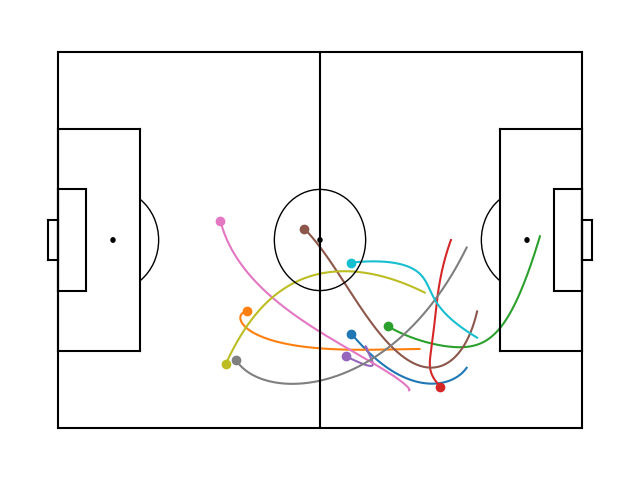

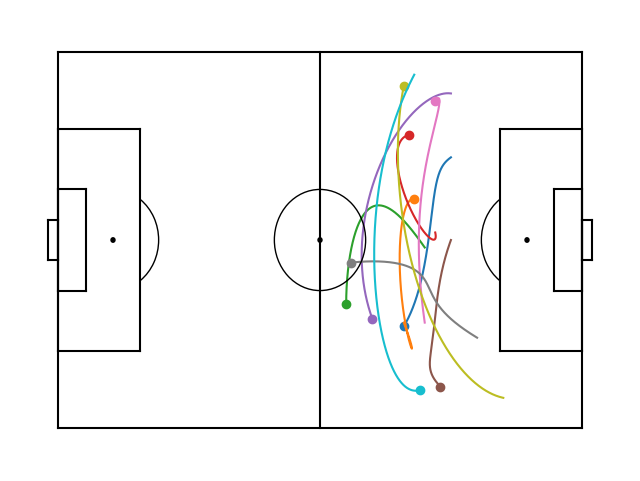

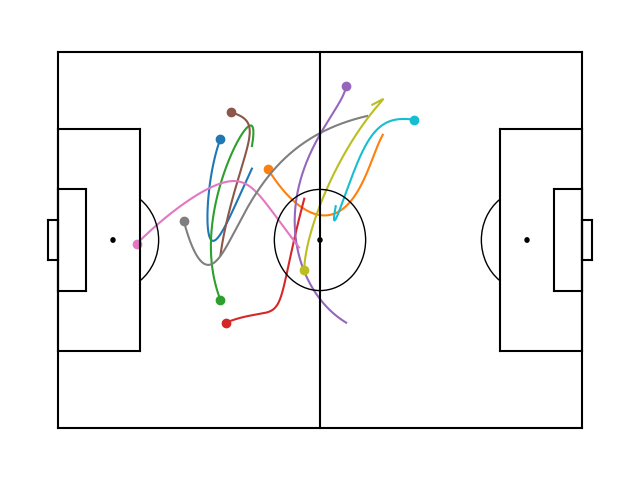

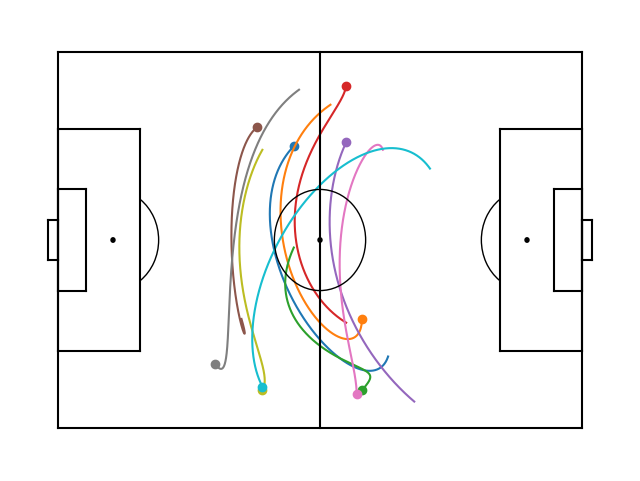

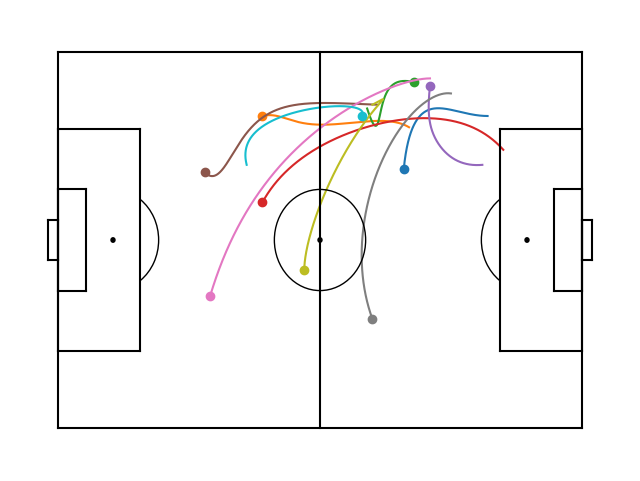

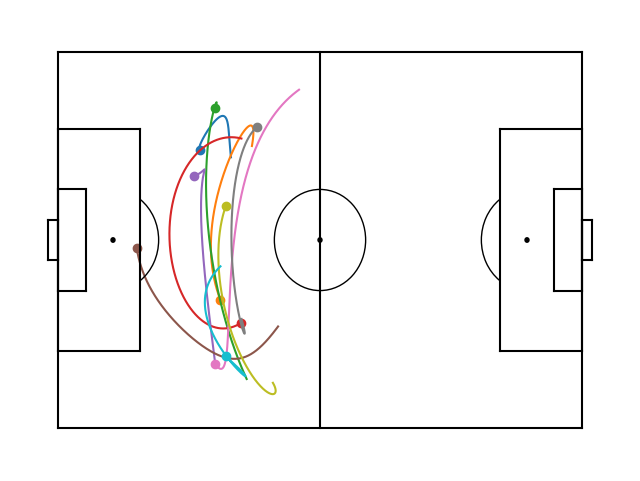

In [5]:
my_dict = {'Topic_' + str(i+1): [token for token, score in lda_model.show_topic(i, topn=10)] for i in range(0, lda_model.num_topics)}
t_points = np.arange(0, 1, 0.0001)
for topic in my_dict:
    matplotsoccer.field("white",figsize=8, show=False) 
    for i in my_dict[topic]:
        a = sample_movement_chains[int(i)]
        a = Bezier.Curve(t_points, a)
        start, = plt.plot(a[0][0]*105,a[0][1]*68,"o")
        plt.plot(a[:, 0]*105, a[:, 1]*68, color = start.get_color())

In [6]:
PROJECT_ROOT = Path.cwd().resolve().parent   
OUT = PROJECT_ROOT / "data" / "derived"
OUT.mkdir(parents=True, exist_ok=True)

with open(OUT / "lda_model.pkl", "wb") as f:
    pickle.dump(lda_model, f)

with open(OUT / "corpus_train.pkl", "wb") as f:
    pickle.dump(corpus_train, f)